Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


Data Input

In [2]:
df = pd.read_csv("Landslide_dataset.csv")
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


Data Analysis/Cleaning

In [3]:
# Check for missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


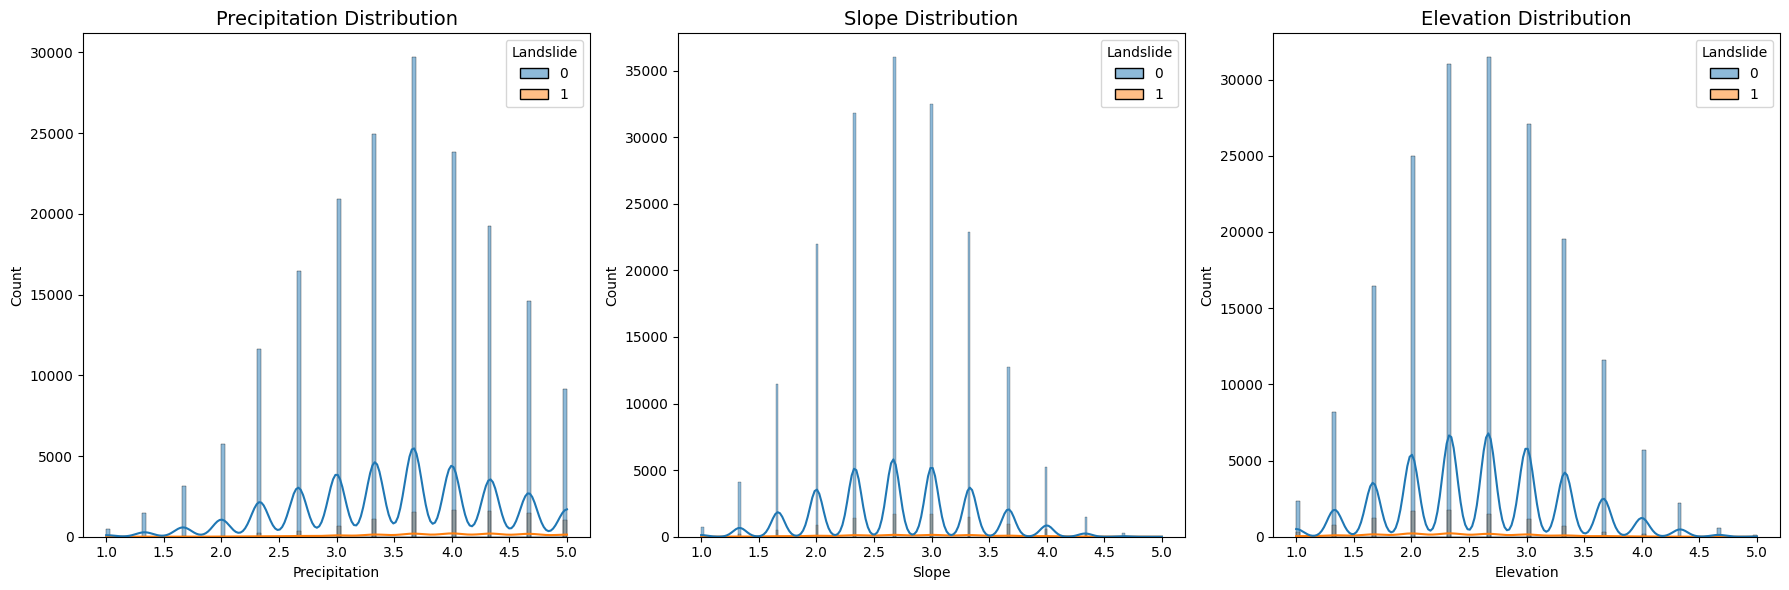

In [4]:
# Visualize precipitation, slope, elevation distributions
plt.figure(figsize=(18, 6))

# Precipitation Distribution
plt.subplot(1, 3, 1)
sns.histplot(df, x="Precipitation", hue='Landslide', kde=True)
plt.title("Precipitation Distribution", fontsize=14)

# Slope Distribution
plt.subplot(1, 3, 2)
sns.histplot(df, x="Slope", hue='Landslide', kde=True)
plt.title("Slope Distribution", fontsize=14)

# Elevation Distribution
plt.subplot(1, 3, 3)
sns.histplot(df, x="Elevation", hue='Landslide', kde=True)
plt.title("Elevation Distribution", fontsize=14)

plt.tight_layout()
plt.show()

EDA

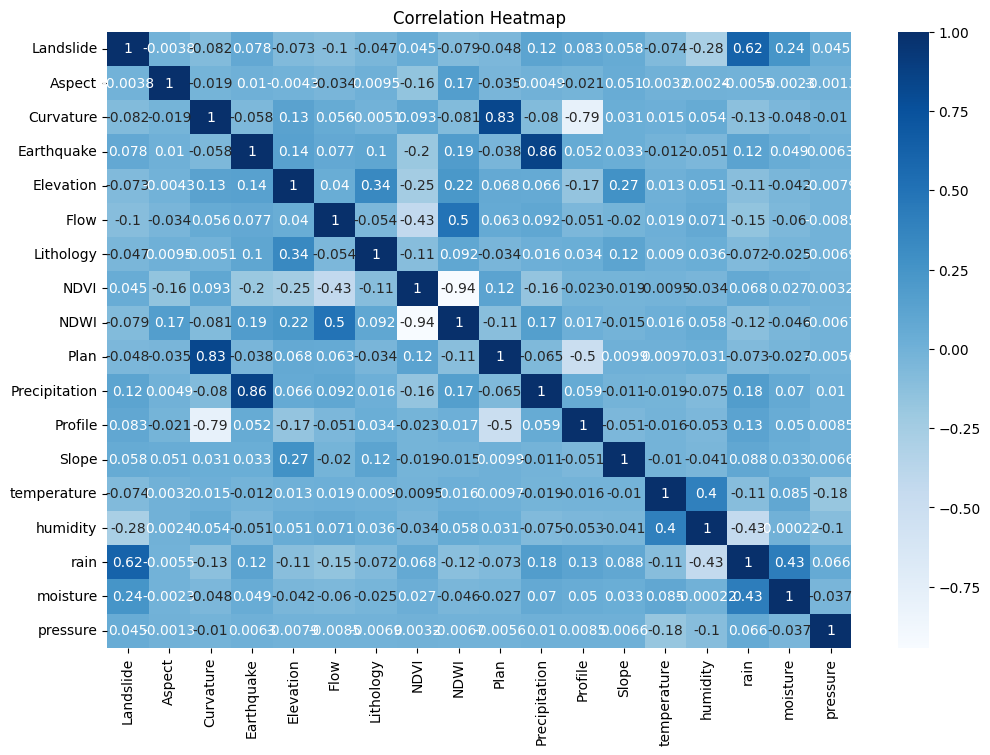

In [5]:
# Correlation analysis
# Correlation heatmap
numeric_data = df.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Data Processing 

In [6]:
#Specify the target variable
target_column = 'Landslide'

# Specify your features and target
X = df.drop(columns=[target_column])
y = df[target_column]


In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
# Train a model on the resampled data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [10]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36263
           1       0.93      0.96      0.94      1915

    accuracy                           0.99     38178
   macro avg       0.96      0.98      0.97     38178
weighted avg       0.99      0.99      0.99     38178



In [11]:
# Fit Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

Feature Importance

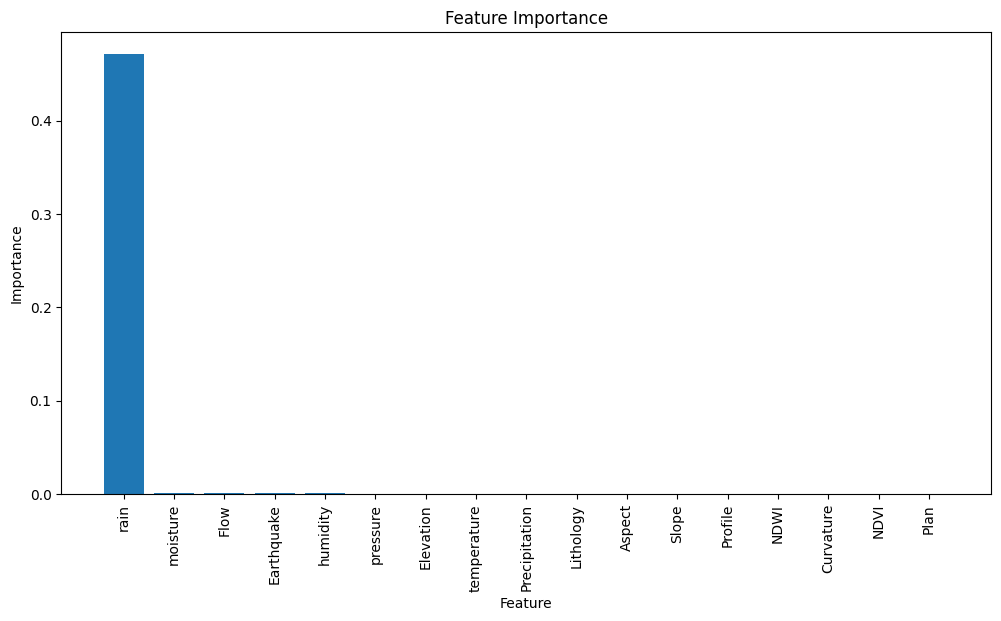

In [12]:
# Create and fit a classifier model (Random Forest, for example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Calculate permutation feature importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances and indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train_resampled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_resampled.shape[1]), X_train_resampled.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


Decision Tree Classifier 

Decision Tree Classifier Accuracy: 0.9957829116244958
Confusion Matrix (Decision Tree):
[[36178    85]
 [   76  1839]]
Precision: 0.9558212058212058
Recall: 0.960313315926893
F1-score: 0.9580619953112789


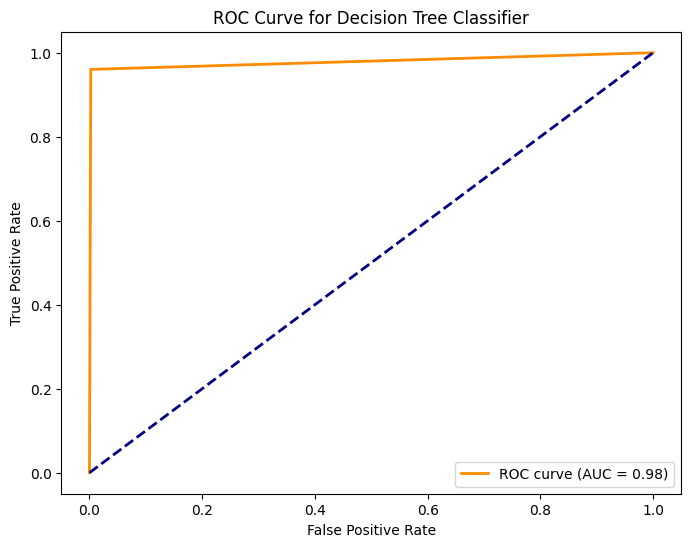

In [13]:
# Evaluate the model on the test set
dtc_model_score = dtc_model.score(X_test, y_test)
print("Decision Tree Classifier Accuracy:", dtc_model_score)

# Confusion matrix for Decision Tree Classifier
dtc_y_pred = dtc_model.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
print("Confusion Matrix (Decision Tree):")
print(dtc_cm)

# Additional Evaluation Metrics
dtc_precision = precision_score(y_test, dtc_y_pred)
dtc_recall = recall_score(y_test, dtc_y_pred)
dtc_f1 = f1_score(y_test, dtc_y_pred)

print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("F1-score:", dtc_f1)

# Plot ROC Curve
dtc_y_scores = dtc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dtc_y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix (Decision Tree Classifier):
[[36178    85]
 [   76  1839]]


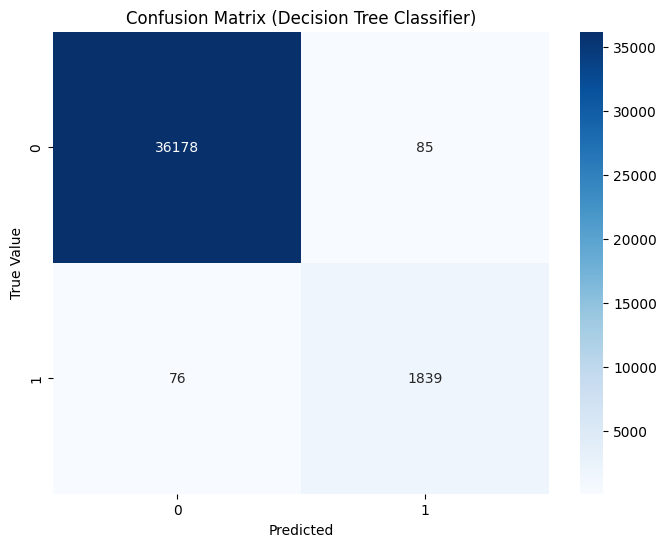

In [14]:
# Confusion matrix for Decision Tree Classifier
dtc_y_pred = dtc_model.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
print("Confusion Matrix (Decision Tree Classifier):")
print(dtc_cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()


Precision curve,  Recall curve, F1-score curve, Accuracy curve of DecisionTreeClassifier:

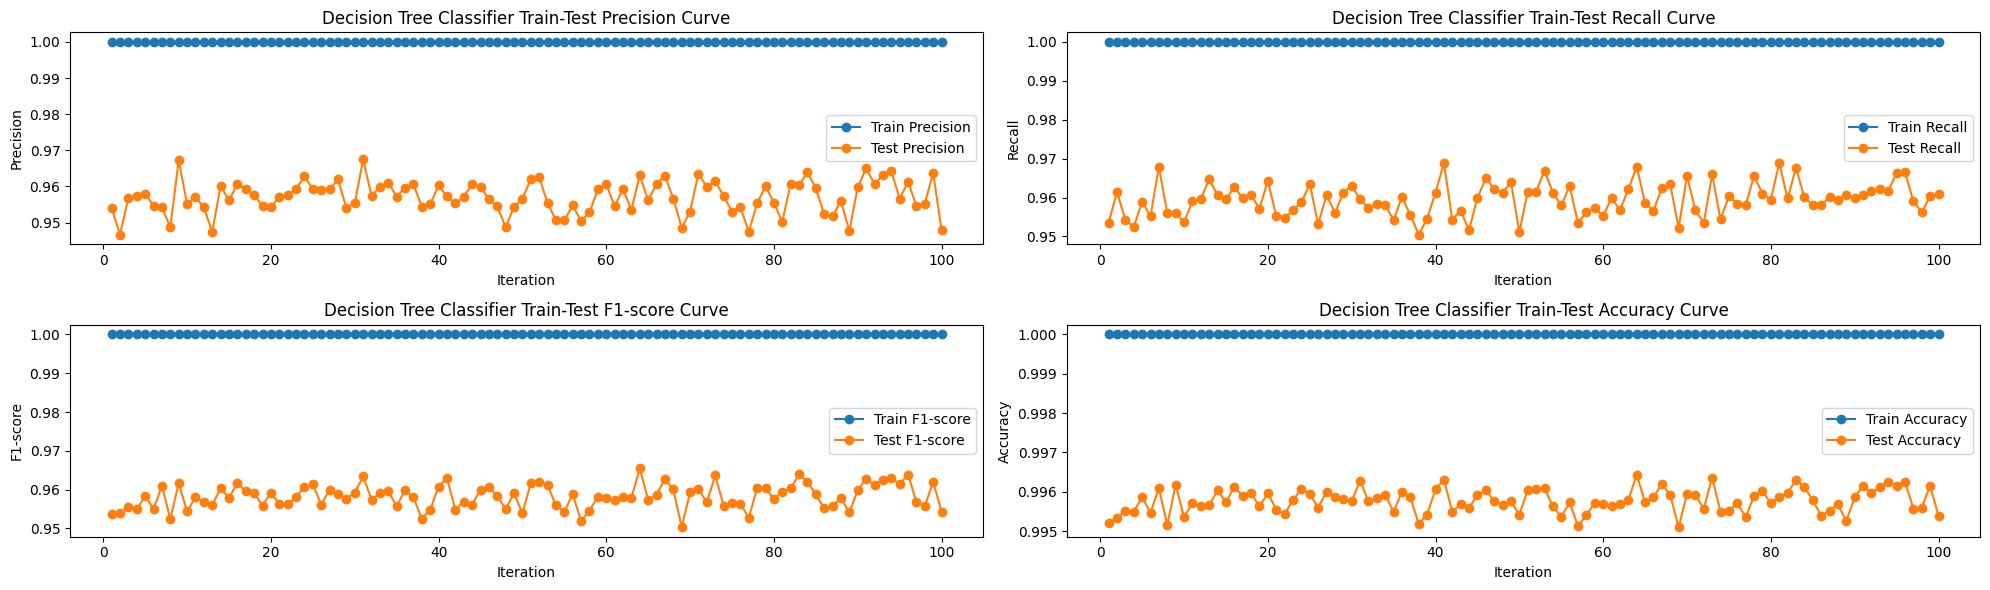

In [15]:
# Initialize lists to store train and test scores for each iteration
dtc_train_precision, dtc_test_precision = [], []
dtc_train_recall, dtc_test_recall = [], []
dtc_train_f1, dtc_test_f1 = [], []
dtc_train_accuracy, dtc_test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    dtc_model = DecisionTreeClassifier()
    dtc_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = dtc_model.predict(X_train)
    y_test_pred = dtc_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    dtc_train_precision.append(precision_score(y_train, y_train_pred))
    dtc_test_precision.append(precision_score(y_test, y_test_pred))

    dtc_train_recall.append(recall_score(y_train, y_train_pred))
    dtc_test_recall.append(recall_score(y_test, y_test_pred))

    dtc_train_f1.append(f1_score(y_train, y_train_pred))
    dtc_test_f1.append(f1_score(y_test, y_test_pred))

    dtc_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    dtc_test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot train-test curves for Decision Tree Classifier
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, dtc_train_precision, marker='o', label='Train Precision')
plt.plot(iterations, dtc_test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, dtc_train_recall, marker='o', label='Train Recall')
plt.plot(iterations, dtc_test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Decision Tree Classifier Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, dtc_train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, dtc_test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Decision Tree Classifier Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, dtc_train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, dtc_test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

MSE

In [16]:
mse = mean_squared_error(y_test, dtc_y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09565718476609565
